In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
import importlib
import coffea.util as util
import time
import json
import os
import numba as nb
import awkward.numba

sys.path.append("../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines

sample_cfg_dir = "../AllYears/sample_configs/"

## Import

## Read branch

In [21]:
# open the first file in the list
t = {}

#t['bkg'] = uproot.open(ntuples_bkg['Top_TTJets'])['ntuples/outT']

In [22]:
t['2018'] = uproot.open('/uscms_data/d3/kyungmip/iDMe_Dec2024/CMSSW_10_6_26/src/iDMe/AODSkimmer/test_signal2018.root')['ntuples/outT']
t['2017'] = uproot.open('/uscms_data/d3/kyungmip/iDMe_Dec2024/CMSSW_10_6_26/src/iDMe/AODSkimmer/test_signal2017.root')['ntuples/outT']
t['2016post'] = uproot.open('/uscms_data/d3/kyungmip/iDMe_Dec2024/CMSSW_10_6_26/src/iDMe/AODSkimmer/test_signal2016.root')['ntuples/outT']
t['2016pre'] = uproot.open('/uscms_data/d3/kyungmip/iDMe_Dec2024/CMSSW_10_6_26/src/iDMe/AODSkimmer/test_signal2016APV.root')['ntuples/outT']


In [23]:
ak.count_nonzero(t['2018']['signalReconstructed'].array())/len(t['2018']['signalReconstructed'].array())

0.10374

In [24]:
effNum = {}
effDenom = {}
eff = {}

In [25]:
for year in t.keys():
    effNum[year] = ak.count_nonzero(t[year]['signalReconstructed'].array())
    effDenom[year] = len(t[year]['signalReconstructed'].array())
    eff[year] = effNum[year] / effDenom[year]

In [26]:
effNum

{'2018': 5187, '2017': 5167, '2016post': 3494, '2016pre': 2493}

In [27]:
effDenom

{'2018': 50000, '2017': 50000, '2016post': 31374, '2016pre': 31611}

In [28]:
eff

{'2018': 0.10374,
 '2017': 0.10334,
 '2016post': 0.11136609931790654,
 '2016pre': 0.07886495207364524}

In [29]:
eff['2016'] = (effNum['2016post']+effNum['2016pre'])/(effDenom['2016post']+effDenom['2016pre'])

In [30]:
eff

{'2018': 0.10374,
 '2017': 0.10334,
 '2016post': 0.11136609931790654,
 '2016pre': 0.07886495207364524,
 '2016': 0.09505437802651424}

In [31]:
efflist = [eff['2016'], eff['2017'], eff['2018']]
xlist = ['2016','2017','2018']

In [ ]:
import mplhep as hep
hep.style.use("CMS")


plt.plot(xlist, efflist, '-o')

plt.ylim([0,0.5])
plt.grid()
plt.title(r"$(m_{1},\Delta,c\tau)$=(80 GeV,0.2,100 mm)")

Text(0.5, 1.0, '$(m_{1},\\Delta,c\\tau)$=(80 GeV,0.2,100 mm)')

In [35]:
import hist

In [36]:
h_num = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_denom = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

In [37]:
h_num.fill(eff_num)
h_denom.fill(eff_denom)

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 565791.0 (736484.0 with flow)

In [38]:
h_num

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 443838.0 (736484.0 with flow)

In [39]:
h_num / h_denom

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: nan (nan with flow)

In [40]:
h_num / h_num

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: nan (nan with flow)

In [43]:
eff_2018 = h_num / h_denom

In [45]:
t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2017_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg.root')['ntuples/outT']
eff_num = ak.flatten(t['bkg']['PFJet_bTagEffNumPt'].array())
eff_denom = ak.flatten(t['bkg']['PFJet_bTagEffDenomPt'].array())

h_num = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_denom = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_num.fill(eff_num)
h_denom.fill(eff_denom)

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 391765.0 (509406.0 with flow)

In [46]:
eff_2017 = h_num / h_denom

In [47]:
t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2016_postVFP_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg.root')['ntuples/outT']
eff_num = ak.flatten(t['bkg']['PFJet_bTagEffNumPt'].array())
eff_denom = ak.flatten(t['bkg']['PFJet_bTagEffDenomPt'].array())

h_num = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_denom = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_num.fill(eff_num)
h_denom.fill(eff_denom)

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 173824.0 (230804.0 with flow)

In [48]:
eff_2016_postVFP = h_num / h_denom

In [49]:
t['bkg'] = uproot.open('/eos/uscms//store/group/lpcmetx/iDMe/skimmed_ntuples/bkg/bkg_2016_preVFP_10X_systematics_rdfSkim_MET200_nJetsG0/haddBkg.root')['ntuples/outT']
eff_num = ak.flatten(t['bkg']['PFJet_bTagEffNumPt'].array())
eff_denom = ak.flatten(t['bkg']['PFJet_bTagEffDenomPt'].array())

h_num = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_denom = hist.Hist(
    hist.axis.Regular(
        20, 0, 300, name="pt", label="pt [GeV]", underflow=True, overflow=True
    )
)

h_num.fill(eff_num)
h_denom.fill(eff_denom)

Hist(Regular(20, 0, 300, name='pt', label='pt [GeV]'), storage=Double()) # Sum: 139634.0 (186681.0 with flow)

In [50]:
eff_2016_preVFP = h_num / h_denom

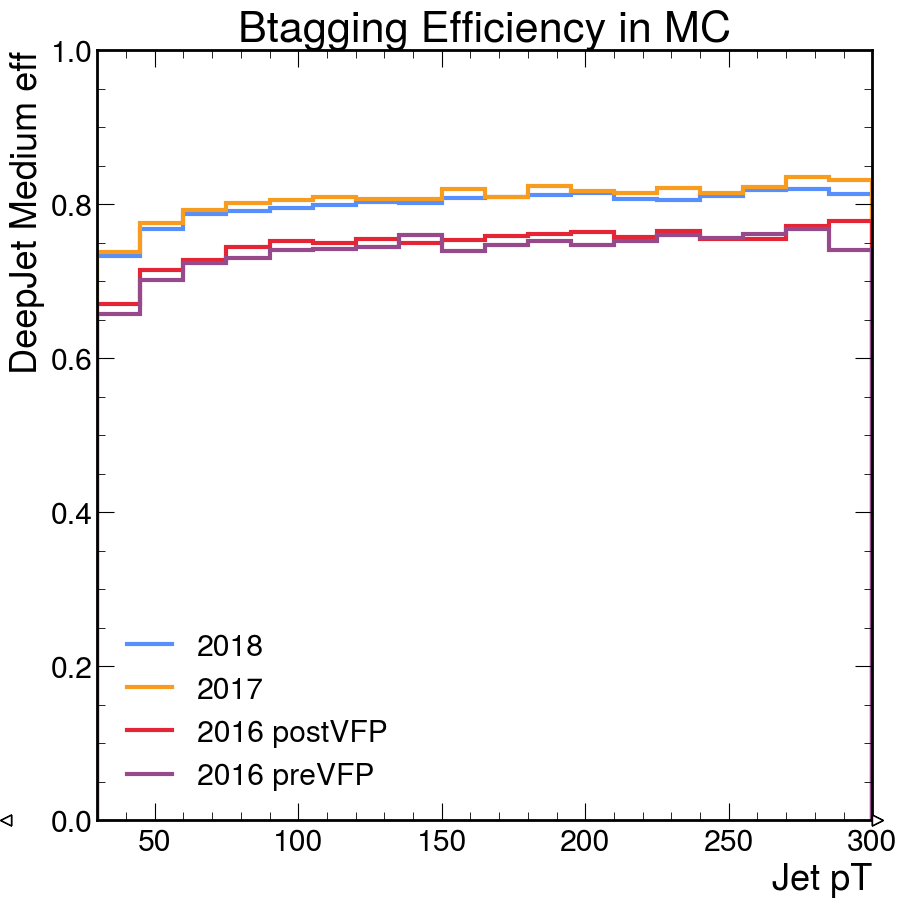

In [57]:
import mplhep as hep

hep.style.use("CMS")


eff_2018.plot(label='2018',linewidth=3)
eff_2017.plot(label='2017',linewidth=3)
eff_2016_postVFP.plot(label='2016 postVFP',linewidth=3)
eff_2016_preVFP.plot(label='2016 preVFP',linewidth=3)

plt.ylabel('DeepJet Medium eff')
plt.xlabel('Jet pT')
plt.ylim([0,1])
plt.xlim([30,300])

plt.title('Btagging Efficiency in MC')

plt.legend()

plt.savefig('btag_eff.png',bbox_inches='tight')

In [121]:
# do something like MET resolution scripts (efficiency)
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic

truth_means, bin_edges, binnumber = binned_statistic(eff_denom, eff_denom, statistic='mean', bins=binnings, range=(0, 400))

tagged_means, _, _ = binned_statistic(eff_denom, eff_num, statistic='mean', bins=binnings, range=(0, 400))

eff = tagged_means / truth_means


In [125]:
denom, _, _ = binned_statistic(eff_denom, eff_denom, statistic='mean', bins=binnings, range=(0, 400))

In [126]:
num, _, _ = binned_statistic(eff_denom, eff_num, statistic='mean', bins=binnings, range=(0, 400))

In [127]:
num / denom

array([        nan,         nan,  1.        ,         nan, -5.14217908,
        1.        ,  1.        ,  1.        ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])